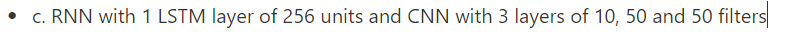

# deep-neural-network-decoder/RNN

## Load data


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### clone it in your google drive

In [ ]:
%cd /content/gdrive/MyDrive/project_3/PE

/content/gdrive/.shortcut-targets-by-id/1VA_Q4n6Gjd05CQ7F8bDu_UxD_UY-UpDA/project_3/PE


In [ ]:
! git clone https://github.com/levylv/deep-neural-network-decoder.git

fatal: destination path 'deep-neural-network-decoder' already exists and is not an empty directory.


### 

###  get code fore generate data from deep-neural-network-decoder => RNN

into /content/gdrive/MyDrive/project_3/PE/data

In [ ]:
%mkdir -p /content/project_3/PE/data

In [ ]:
%cd /content/project_3/PE

/content/project_3/PE


we are generating data into 

/content/project_3/PE/data 

it will take a while 

In [ ]:
!python /content/gdrive/MyDrive/project_3/PE/deep-neural-network-decoder/RNN/noise/K_16_N_32/"train_data_10^6"/get_data.py

### partition the data

---



In [ ]:
#gorbage collector 
#import gc

In [ ]:
import numpy as np 
train_batch_size = 128
train_snr = np.arange(20, -4, -2)
test_snr = np.arange(0, 6.5, 0.5)
train_ratio = np.array([0.4, 0.6, 0.8, 1.0])
epoch_setting = np.array([10**1, 10**2, 10**3, 10**4, 10**5])

In [ ]:
import scipy.io as sio
train_data = sio.loadmat("/content/project_3/PE/data/ratio_0.4_train_snr_-2dB")
temp = train_data['x_train']
temp.shape

(1000000, 32)

In [ ]:
x_train = np.zeros([len(train_snr),*temp.shape])
y_train = np.zeros([len(train_snr),*temp.shape])
x_train.shape

(12, 1000000, 32)

In [ ]:
del temp , train_data, x_train, y_train

In [ ]:
def get_data_by_ratio (train_ratio, snr, status = "train", limit= None,
                      data_path = "/content/project_3/PE/data/"):

    
    if status == "train" : data = sio.loadmat(data_path+"ratio_0.4_train_snr_8dB")
    elif status == "test" : data = sio.loadmat(data_path+'test_snr_0.0dB')
    x_shape = data['x_'+status].shape
    y_shape = data['y_'+status].shape
    x_shape = [min(x_shape[0],limit) , x_shape[1]]
    y_shape = [min(y_shape[0],limit) , y_shape[1]]

    x = np.zeros([len(snr),*x_shape])
    y = np.zeros([len(snr),*y_shape])
    print(x_shape)
    del data

   
    for i, tr_snr in enumerate(snr):
        print("added {} SNR".format(tr_snr))
        if status == "train" : filename = 'ratio_' + str(train_ratio) + '_train_snr_' + str(tr_snr) + 'dB'
        elif status == "test" : filename = 'test_snr_' + str(tr_snr) + 'dB'
        data = sio.loadmat(data_path+filename)
        x[i,:,:] = data['x_'+status][:limit,:]
        y[i,:,:] = data['y_'+status][:limit,:]

    return [x , y]

In [ ]:
path = "/content/project_3/PE/"
X_train, y_train = get_data_by_ratio (train_ratio = 0.8 ,snr = train_snr,status = "train", limit= 500000)

np.savez_compressed( path + 'train_shape', X_train_shape= np.array(X_train.shape) , y_train_shape = np.array(y_train.shape))
print("train data shape saved")
np.savez_compressed( path + 'train', X_train= X_train.reshape(-1,1), y_train = y_train.reshape(-1,1))
print("train data saved")

[500000, 32]
added 20 SNR
added 18 SNR
added 16 SNR
added 14 SNR
added 12 SNR
added 10 SNR
added 8 SNR
added 6 SNR
added 4 SNR
added 2 SNR
added 0 SNR
added -2 SNR
train data shape saved
train data saved


In [ ]:
del X_train, y_train

In [ ]:
X_test, y_test = get_data_by_ratio (train_ratio = 0.8 ,snr = test_snr,status = "test", limit= int(500000*0.2))

np.savez_compressed( path + 'test_shape', X_test_shape= np.array(X_test.shape) , y_test_shape = np.array(y_test.shape))
print("test data shape saved")
np.savez_compressed( path + 'test', X_test= X_test.reshape(-1,1), y_test = y_test.reshape(-1,1))
print("test data saved")

[100000, 32]
added 0.0 SNR
added 0.5 SNR
added 1.0 SNR
added 1.5 SNR
added 2.0 SNR
added 2.5 SNR
added 3.0 SNR
added 3.5 SNR
added 4.0 SNR
added 4.5 SNR
added 5.0 SNR
added 5.5 SNR
added 6.0 SNR
test data shape saved
test data saved


In [ ]:
#del X_test, y_test

### save data in google drive directory 

/content/gdrive/MyDrive/project_3/PE

In [ ]:

path = "/content/gdrive/MyDrive/project_3/PE"
np.savez_compressed( path + 'test_shape', X_test_shape= np.array(X_test.shape) , y_test_shape = np.array(y_test.shape))
print("test data shape saved")
np.savez_compressed( path + 'test', X_test= X_test.reshape(-1,1), y_test = y_test.reshape(-1,1))
print("test data saved")
np.savez_compressed( path + 'train_shape', X_train_shape= np.array(X_train.shape) , y_train_shape = np.array(y_train.shape))
print("train data shape saved")
np.savez_compressed( path + 'train', X_train= X_train.reshape(-1,1), y_train = y_train.reshape(-1,1))
print("train data saved")

test data shape saved
test data saved
train data shape saved
train data saved


### Load data 

from googel drive 

In [ ]:
path = "/content/gdrive/MyDrive/project_3/PE"

loaded = np.load( path + 'train.npz')
loaded_shape = np.load( path + 'train_shape.npz')

X_train_shape , y_train_shape = loaded_shape["X_train_shape"] , loaded_shape["y_train_shape"] 
X_train , y_train = loaded["X_train"].reshape(X_train_shape) , loaded["y_train"].reshape(y_train_shape)

loaded = np.load( path + 'test.npz')
loaded_shape = np.load( path + 'test_shape.npz')
X_test_shape , y_test_shape = loaded_shape["X_test_shape"] , loaded_shape["y_test_shape"] 
X_test , y_test = loaded["X_test"].reshape(X_test_shape) , loaded["y_test"].reshape(y_test_shape)

**OR**

if you load it in colab from content 

In [ ]:
X_train_shape

array([    12, 500000,     32])

In [ ]:
path = "/content/project_3/PE/"

loaded = np.load( path + 'train.npz')
loaded_shape = np.load( path + 'train_shape.npz')
X_train_shape , y_train_shape = loaded_shape["X_train_shape"] , loaded_shape["y_train_shape"] 
X_train , y_train = loaded["X_train"].reshape(X_train_shape) , loaded["y_train"].reshape(y_train_shape)

loaded = np.load( path + 'test.npz')
loaded_shape = np.load( path + 'test_shape.npz')
X_test_shape , y_test_shape = loaded_shape["X_test_shape"] , loaded_shape["y_test_shape"] 
X_test , y_test = loaded["X_test"].reshape(X_test_shape) , loaded["y_test"].reshape(y_test_shape)

print(X_train.shape)

(12, 500000, 32)


make data independent of snr

In [ ]:
cut = 1000
X_train , y_train = X_train[:,:cut,:] ,y_train[:,cut,:]
X_test , y_test = X_test[:,:int(cut*0.2),:] ,y_test[:,:int(cut*0.2),:]

In [ ]:
X_train , y_train = X_train.reshape(-1,X_train_shape[-1]) , y_train.reshape(-1,y_train_shape[-1])
X_test , y_test = X_test.reshape(-1,X_test_shape[-1]) , y_test.reshape(-1,y_test_shape[-1])

In [ ]:
print(X_train.shape)

(12000, 32)


## Network

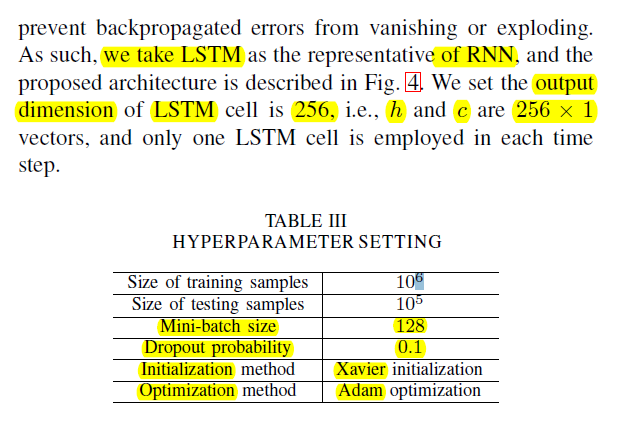

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from tensorflow.keras import layers , Input
from tensorflow.keras.layers import Dense , LSTM ,Dropout , Activation ,Reshape


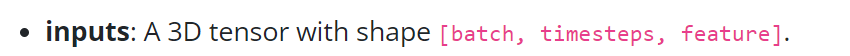

In [ ]:
def RNN_model (input_shape,output_shape, Dropout_rate = 0.1) :
  
    input_signal = Input(shape = input_shape)
    reshape = Reshape((*input_shape,1))(input_signal)
    lstm = LSTM(256,
                dropout = Dropout_rate,
                kernel_initializer= tf.keras.initializers.GlorotNormal(seed=None))(reshape)

    output = Dense(output_shape,"sigmoid")(lstm)
    
    return Model(inputs = input_signal, outputs = output)

model = RNN_model (X_train[0].shape , y_train[0].shape[0])   
print(model.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 32)]              0         
                                                                 
 reshape_1 (Reshape)         (None, 32, 1)             0         
                                                                 
 lstm_13 (LSTM)              (None, 256)               264192    
                                                                 
 dense_1 (Dense)             (None, 16)                4112      
                                                                 
Total params: 268,304
Trainable params: 268,304
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
with tf.device('/device:GPU:0'):
    model = RNN_model (X_train[0].shape , y_train[0].shape)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss= tf.keras.losses.MeanSquaredError(),
        metrics=["accuracy"],
    )  
    history = model.fit(X_train[0:2],y_train[0:2],
              validation_data=(X_test, y_test),
              epochs=20, batch_size=128, verbose=2 )